In [ ]:
#Importing the packages
from transformers import DistilBertTokenizer, DistilBertForQuestionAnswering,DistilBertModel
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load pre-trained model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased-distilled-squad')
model = DistilBertForQuestionAnswering.from_pretrained('distilbert-base-cased-distilled-squad')

def answer_question(context, question):
    # Tokenize input
    inputs = tokenizer(question, context, return_tensors='pt')

    # Get model output
    outputs = model(**inputs)

    # Decode the start and end indices of the answer
    start_index = torch.argmax(outputs['start_logits'])
    end_index = torch.argmax(outputs['end_logits']) + 1

    # Get the answer from the original context
    answer = tokenizer.decode(inputs['input_ids'][0, start_index:end_index])

    return answer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

In [ ]:
# Load pre-trained model and tokenizer
tokenizer1 = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
model1 = DistilBertModel.from_pretrained('distilbert-base-cased')
def encode_sentence(sentence):
    # Tokenize input
    inputs = tokenizer1(sentence, return_tensors='pt')

    # Get model output
    outputs = model1(**inputs)

    # Extract the embeddings from 'last_hidden_state'
    embeddings = outputs.last_hidden_state

    return embeddings

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [ ]:
def visualize_word_embeddings(embeddings, tokens):
    # Use t-SNE to reduce dimensionality for visualization
    tsne_model = TSNE(n_components=2, random_state=42, perplexity=min(5, len(tokens)-1))
    word_vectors_2D = tsne_model.fit_transform(embeddings)

    # Plotting the words in 2D
    plt.figure(figsize=(8, 6))
    for i, token in enumerate(tokens):
        plt.scatter(word_vectors_2D[i, 0], word_vectors_2D[i, 1], marker='o', color='b')
        plt.text(word_vectors_2D[i, 0] + 0.02, word_vectors_2D[i, 1] + 0.02, token, fontsize=9)

    plt.show()

In [ ]:
def calculate_cosine_similarity(embeddings1, embeddings2):
    # Detach tensors before converting to numpy arrays
    embeddings1 = embeddings1.detach().numpy()
    embeddings2 = embeddings2.detach().numpy()

    # Reshape embeddings if needed
    embeddings1 = embeddings1.reshape(1, -1)
    embeddings2 = embeddings2.reshape(1, -1)

    # Calculate cosine similarity
    similarity_matrix = cosine_similarity(embeddings1, embeddings2)
    # Extract the similarity score
    similarity_score = similarity_matrix[0, 0]

    return similarity_score

virat played in ipl
virat not played in ipl
visualization of word embedding


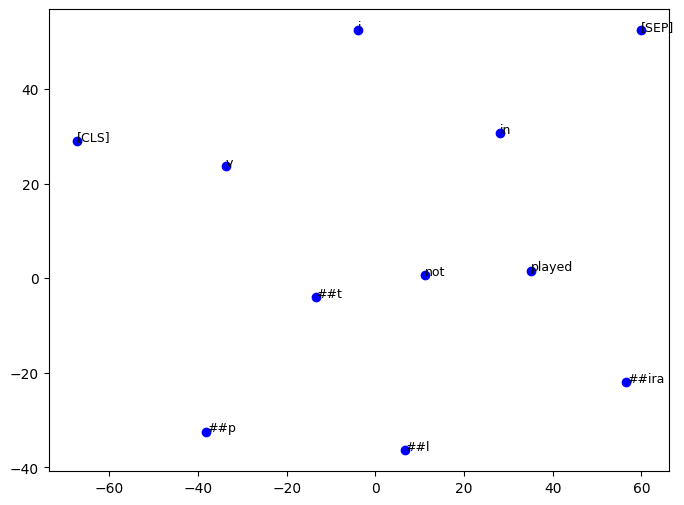

In [ ]:
# Example usage
context =input()
question =input()

# Encode the sentence to get the embeddings
embeddings = encode_sentence(question)

# Extract word vectors directly from the model
word_vectors = embeddings[0].detach().numpy()

# Tokenize input for visualization
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(question)))

# Visualize word embeddings
print("visualization of word embedding")
visualize_word_embeddings(word_vectors, tokens)

In [ ]:
# Example usage
context_embeddings = encode_sentence_sim(context)
question_embeddings = encode_sentence_sim(question)
similarity_score = calculate_cosine_similarity(context_embeddings, question_embeddings)
print(f"Cosine Similarity between context and question: {similarity_score}")

Cosine Similarity between context and question: 0.9886564612388611
